In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Threads: 1, Time taken: 169.42 seconds
Threads: 2, Time taken: 95.54 seconds
Threads: 3, Time taken: 84.29 seconds
Threads: 4, Time taken: 81.71 seconds
Threads: 5, Time taken: 81.84 seconds
Threads: 6, Time taken: 82.89 seconds
Threads: 7, Time taken: 83.34 seconds
Threads: 8, Time taken: 93.61 seconds


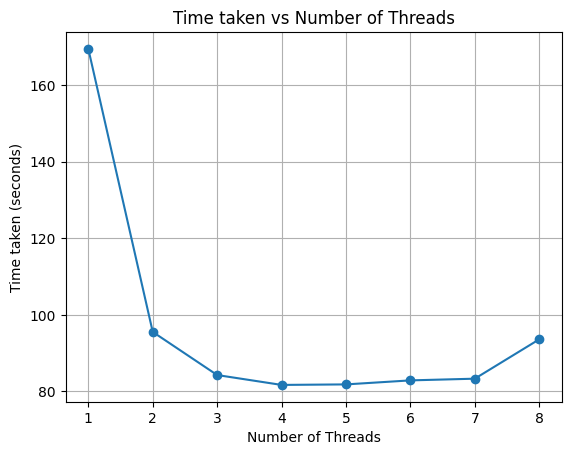

In [3]:
import multiprocessing
import time
import matplotlib.pyplot as plt

def generate_matrices(num_matrices, matrix_size):
    matrices = [np.random.rand(matrix_size, matrix_size) for _ in range(num_matrices)]
    constant_matrix = np.random.rand(matrix_size, matrix_size)
    return matrices, constant_matrix

def multiply_matrices(matrix_pair):
    matrix, constant_matrix = matrix_pair
    return np.dot(matrix, constant_matrix)

def run_parallel_multiplication(num_threads, matrices, constant_matrix):
    start_time = time.time()
    pool = multiprocessing.Pool(processes=num_threads)
    results = pool.map(multiply_matrices, [(matrix, constant_matrix) for matrix in matrices])
    pool.close()
    pool.join()
    end_time = time.time()
    return end_time - start_time

if __name__ == "__main__":
    num_matrices = 200
    matrix_size = 2000
    num_cores = multiprocessing.cpu_count()
    num_threads = 2 * num_cores

    matrices, constant_matrix = generate_matrices(num_matrices, matrix_size)

    times = []
    for i in range(1, num_threads + 1):
        time_taken = run_parallel_multiplication(i, matrices, constant_matrix)
        times.append(time_taken)
        print(f"Threads: {i}, Time taken: {time_taken:.2f} seconds")

    # Plotting
    plt.plot(range(1, num_threads + 1), times, marker='o')
    plt.xlabel('Number of Threads')
    plt.ylabel('Time taken (seconds)')
    plt.title('Time taken vs Number of Threads')
    plt.grid(True)
    plt.show()
